In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import imageio
plt.close('all')
import random

In [2]:
def prob(x0,y0,x,y,a,A):
    r=np.sqrt((x-x0)**2+(y-y0)**2)
    if r==0:
        return 1
    else:
        p=A*np.exp(-(r**a))#A/(r**(a))
        #print(p)
        return p
   
    
def makec(p):
    p=int(p*100)
    t=np.random.random_integers(100)
    #print(t,p)
    if p>t:
        return True
    else:
        return False
    
    
def rgba2rgb( rgba, background=(255,255,255) ):
    row, col, ch = rgba.shape

    if ch == 3:
        return rgba

    assert ch == 4, 'RGBA image has 4 channels.'

    rgb = np.zeros( (row, col, 3), dtype='float32' )
    r, g, b, a = rgba[:,:,0], rgba[:,:,1], rgba[:,:,2], rgba[:,:,3]

    a = np.asarray( a, dtype='float32' ) / 255.0

    R, G, B = background

    rgb[:,:,0] = (r * a + (1.0 - a) * R) /255
    rgb[:,:,1] = (g * a + (1.0 - a) * G) /255
    rgb[:,:,2] = (b * a + (1.0 - a) * B) /255

    return np.asarray( rgb, dtype='uint8' )


def circle(x0,y0,r):
    
    x1=np.linspace(x0-r,x0+r,3000,endpoint=True)
    x2=np.linspace(x0-r,x0+r,3000,endpoint=True)
    y1=np.sqrt(r**2-(x1-x0)**2)+y0
    y2=-1*np.sqrt(r**2-(x1-x0)**2)+y0
    x=np.append(x1,x2)
    y=np.append(y1,y2)
        
    return x,y 

def circletest(x0, y0, r0, x1, y1, r1):
    # circle 1: (x0, y0), radius r0
    # circle 2: (x1, y1), radius r1

    d=np.sqrt((x1-x0)**2 + (y1-y0)**2)
    
    #print('d',d,r1,r0)
    
    # non intersecting
    if d > r0 + r1 and r0 != r1:
        #print('1')
        return 0
    # One circle within other
    if d < abs(r0-r1):
        #print('2')
        return 1
    # coincident circles
    if d == 0 and r0 == r1:
        #print('3')
        return 0
    else:
        #print('4')
        return 1

    
def splitprob(r,low,high):
    if r <= low:
        diff = 0
    else:
        diff = ((1/(high-low))**3 * (r-low)**3)*100
    return 100-diff
    
def circletest_array(x0, y0, r0):
    # circle 1: (x0, y0), radius r0
    # circle 2: (x1, y1), radius r1
    c_m=np.zeros((len(x0),len(x0)))
    
    
    for i in range(len(x0)):
         for j in range(len(x0)):
                c_m[i,j]=circletest(x0[i], y0[i], r0[i], x0[j], y0[j], r0[j])
    
    #print('sum',np.sum(c_m))
    return np.sum(c_m)
    
def ini_pic(b,r_i,pix,t,run,bg=False):
    #plt.style.use("dark_background")
    #plt.rcParams['axes.facecolor'] = 'black'
    my_dpi=96
    n=pix
    
    
    fig = plt.figure(figsize=(pix/my_dpi, pix/my_dpi), dpi=my_dpi)
    fig = plt.gcf()
    ax = fig.gca()
    
    
    r=r_i/pix
    
    
    
    
    x_pos=np.linspace(1.5*r,1-1.5*r,500)
    y_pos=np.linspace(1.5*r,1-1.5*r,500)

    x=np.array([])
    y=np.array([])
    x0c=np.array([2])
    y0c=np.array([0.5])
    rc=np.array([0])
    split_prob=np.array([0])
    g=0
    while g<b:
        r=r_i/pix
        x0=np.random.choice(x_pos)
        y0=np.random.choice(y_pos)
        r_e=np.random.random_integers(15)
        r=r*(1+(r_e/100))
        s=np.array([])




        if g > 0:
            if g==1:
                if circletest(x0, y0, r, x0c[0], y0c[0], rc[0])==0:
                    x0c=np.append(x0c,x0)
                    y0c=np.append(y0c,y0)
                    rc=np.append(rc,r)
                    split_prob=np.append(split_prob,100-splitprob(r,0.035,0.06))
                    
                    
                    circ=plt.Circle((x0,y0), r, color='red',fill=False)
                    ax.add_patch(circ)
                    
                   
    

                    #x_c,y_c= circle(x0,y0,r)
                    #x=np.append(x,x_c)
                    #y=np.append(y,y_c)
                    g=g+1
                else:
                    print('overlap',g)
                    g=g

            else:
                #print(g,x0c[g],x0)
                for j in range(1,g):
                    #print(circletest(x0, y0, r, x0c[g-j], y0c[g-j], rc[g-j]))
                    s=np.append(s,circletest(x0, y0, r, x0c[g-j], y0c[g-j], rc[g-j]))
                    #print(g,g-j,x0c[g-j],x0,x0c[g])
                if np.sum(s)==0:

                    x0c=np.append(x0c,x0)
                    y0c=np.append(y0c,y0)
                    rc=np.append(rc,r)
                    split_prob=np.append(split_prob,100-splitprob(r,0.035,0.06))
                    
                    circ=plt.Circle((x0,y0), r, color='red',fill=False)
                    ax.add_patch(circ)
                    
                    #xsquare=np.random.choice(x_pos)
                    #ysquare=np.random.choice(y_pos)
                    #rec = plt.Rectangle((xsquare,ysquare), 3*r, 2*r, fc='white',ec="red")
                    #ax.add_patch(rec)

                    #x_c,y_c= circle(x0,y0,r)
                    #x=np.append(x,x_c)
                    #y=np.append(y,y_c)
                    g=g+1
                else:
                    print('overlap',g)
                    g=g

        else:

            x0c=np.append(x0c,x0)
            y0c=np.append(y0c,y0)
            rc=np.append(rc,r)
            
            split_prob=np.append(split_prob,100-splitprob(r,0.035,0.06))


            #x_c,y_c= circle(x0,y0,r)
            #x=np.append(x,x_c)
            #y=np.append(y,y_c)
            
            circ=plt.Circle((x0,y0), r, color='red',fill=False)
            ax.add_patch(circ)
            
            g=g+1
            
            
    plt.gca().set_aspect('equal', adjustable='box')
    
    
    
    
    
    
    
   


    plt.axis('off')

    #plt.scatter(x,y,s=pix**2/n**2,c='red')
    
    
    
    #for v in range(1):
   
    #plt.tick_params(
    #axis='both',          # changes apply to the x-axis
    #which='both',      # both major and minor ticks are affected
    #bottom=False,      # ticks along the bottom edge are off
    #top=False,         # ticks along the top edge are off
    #labelbottom=False) # labels along the bottom edge are off
    
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.savefig('./'+str(run)+'/'+str(t)+'.png',dpi=my_dpi,transparent=False)
    
    
    r_count=np.unique(rc)
    
    ide = np.append(-1,np.arange(1,b+1))
    
    if len(r_count) < b:
        print('!!!!!!!!!!!!!!!!!',len(r_count))
        x0c, y0c, rc,ide,split_prob = ini_pic(b,r_i,pix,t,run,bg=False)



    return x0c, y0c, rc,ide,split_prob
    

def gt(x,y,r,t,run,ide,split_prob,split_id=0,savefile=True,shuffle=False):
    
    
    #plt.rcParams['axes.facecolor'] = 'black'
    my_dpi=96
    
    #print('r',r,np.mean(r))


    t_v=np.ones(len(x))*t
    
    if t==0:
        split_id=np.zeros(len(x))
    
    fig = plt.figure(figsize=(pix/my_dpi, pix/my_dpi), dpi=my_dpi)
    fig = plt.gcf()
    ax = fig.gca()
    
    c = ['#e43b1a','#4a7d5c', '#e5cb14', "#281a32",'#f5b8bc','#d2d7da','#346fb6','#c76b69','#2e2f44','#ca7413']

    
    for i in range(len(x)):
        u=np.random.random_integers(9)
        circ=plt.Circle((x[i], y[i]), r[i], color=c[1],fill=True)
        #circ=plt.Circle((x[i], y[i]), r[i], color='black',fill=True)
        ax.add_patch(circ)
    
    plt.axis('off')
    
    plt.gca().set_aspect('equal', adjustable='box')
    
    plt.xlim(0,1)
    plt.ylim(0,1)
    #plt.savefig('./'+str(run)+'_GT'+'/'+str(t)+'.png',dpi=my_dpi,transparent=False)
    
    if shuffle:
        ind = np.argsort(x) 
        #print('ind',ind)
        random.shuffle(ind)
        #print('ind',ind)
        
        #print('x',x)
        #print('y',y)
        x= np.take_along_axis(x, ind, axis=-1)  
        #print('x2',x)
        
        y=np.take_along_axis(y, ind, axis=-1) 
        
        #print('y2',y)
        #print('ind2',ind)
        r=np.take_along_axis(r, ind, axis=-1)
        ide=np.take_along_axis(ide, ind, axis=-1)
        split_id=np.take_along_axis(split_id, ind, axis=-1)
        split_prob=np.take_along_axis(split_prob, ind, axis=-1)
    
    
    
    if savefile:
        if t==0:
            np.savetxt('./'+str(run)+'_GT'+'/'+'pos_GT.txt', np.c_[x,y,r,ide,split_id,split_prob,t_v],delimiter='\t',header='x'+'\t'+'y'+'\t'+'r'+'\t'+'id'+'\t'+'split_id'+'\t'+'s_prob'+'\t'+'t')
        else:    
            xl,yl,rl,idel,split_l,s_pr_l,t_vl= np.loadtxt('./'+str(run)+'_GT'+'/'+'pos_GT.txt',skiprows=1, delimiter='\t', usecols=(0,1,2,3,4,5,6), unpack=True)
            
            xl=np.append(xl,x)
            yl=np.append(yl,y)
            rl=np.append(rl,r)
            t_vl=np.append(t_vl,t_v)
            idel=np.append(idel,ide)
            split_l=np.append(split_l,split_id)
            s_pr_l=np.append(s_pr_l,split_prob)
            np.savetxt('./'+str(run)+'_GT'+'/'+'pos_GT.txt', np.c_[xl,yl,rl,idel,split_l,s_pr_l,t_vl],delimiter='\t',header='x'+'\t'+'y'+'\t'+'r'+'\t'+'id'+'\t'+'split_id'+'\t'+'s_prob'+'\t'+'t')
    plt.close()

def move(x,y,r,mv,t,pix,run,ide,rec=True):
    
    
    
    
    
    
    vec=np.linspace(0,2*np.pi,500)
    
    my_dpi=96
    n=pix
    my_dpi=96
    fig = plt.figure(figsize=(pix/my_dpi, pix/my_dpi), dpi=my_dpi)
    
    plt.axis('off')
    
    plt.gca().set_aspect('equal', adjustable='box')
    ax = fig.gca()
    plt.xlim(0,1)
    plt.ylim(0,1)
    
    
    misdetect=np.random.random_integers(99)
    rec_flag=False
    if misdetect >= 50 and rec==True:
        #print('rec!')
        coord=np.linspace(0,1,num=500)
        xrec=np.random.choice(coord)
        yrec=np.random.choice(coord)
        rrec=np.random.choice(coord)*10
        rec=plt.Rectangle((xrec,yrec), rrec*10**(-2), rrec*10**(-2),fc=None,ec="blue") 
        ax.add_patch(rec)
        rec_flag=True
        
    
    #xp=np.array([0,1])
    #yp=np.array([0,1])
    
    pl=True
    
    

        

    re = np.array([])
    x0c=np.array([])
    y0c=np.array([])
    r0c=np.array([])
    idec=np.array([])
    split_id=np.array([])
    split_prob=np.array([])
    flag=0
    
    
    
    
    #overlap=True
   
    #while overlap:

        #x0c=np.array([])
        #y0c=np.array([])
        #r0c=np.array([])
        #idec=np.array([])
        #split_id=np.array([])
        #flag=0
        #plt.gca().set_aspect('equal', adjustable='box')
        #ax = fig.gca()
       
    for i in range(len(x)):
        x_ra=np.random.random_integers(10)
        y_ra=np.random.random_integers(10)
        phi=np.random.choice(vec)
        x_n=x[i]+(x_ra/10)*mv*np.sin(phi)
        y_n=y[i]+(y_ra/10)*mv*np.cos(phi)
        
        
        r_e0=np.random.random_integers(5)
        re=np.append(re,r_e0)
        #print('ri0',r[i])
        r[i] = r[i]*(1+(r_e0/100))
        #print('ri1',r[i])

        if x_n < 0 or x_n > 1:
            x_n=x[i]-mv*np.sin(phi)

        if y_n < 0 or y_n > 1:
            y_n=y[i]-mv*np.cos(phi)


        sp=np.random.random_integers(99)

        if sp>=splitprob(r[i],0.035,0.06): ###96
            #print(r[i],'split',splitprob(r[i],0.035,0.06))
            flag=flag+1
            x_n1=x_n-1.05*r[i]
            x_n2=x_n+1.05*r[i]


            #r_e=np.random.random_integers(5)

            #r_n1= r[i]*(1+(r_e/100))
            #r_n2= r[i]*(1-(r_e/100))

            #print('r_n1')
            r_e1=np.random.random_integers(15,40)
            r_e2=np.random.random_integers(15,40)

            z=0
            while z<100:


                r_n1= r[i]*(1-(r_e1/100))
                r_n2= r[i]*(1-(r_e2/100))
                #print('r_n1',r_n1)
                #print('r_n2',r_n2)
                if r_n1 in r or r_n2 in r:
                    #print('while',r)
                    r_e1=np.random.random_integers(15,40)
                    r_e2=np.random.random_integers(15,40)
                    #print('r_e',r_e)
                    #r_n1= r[i]*(1+(r_z/100))+r_n1/100
                    #r_n2= r[i]*(1-(r_z/100))+r_n2/100


                    #print()
                    z=z+1
                else:

                    break


            circ1=plt.Circle((x_n1,y_n), r_n1, color='red',fill=False)
            circ2=plt.Circle((x_n2,y_n), r_n2, color='red',fill=False)
            ax.add_patch(circ1)
            ax.add_patch(circ2)
            x0c=np.append(x0c,x_n1)
            y0c=np.append(y0c,y_n)
            x0c=np.append(x0c,x_n2)
            y0c=np.append(y0c,y_n)

            split_id=np.append(split_id,ide[i])
            split_id=np.append(split_id,ide[i])
            
            split_prob=np.append(split_prob,100-splitprob(r_n1,0.035,0.06))
            split_prob=np.append(split_prob,100-splitprob(r_n2,0.035,0.06))


            if len(idec)!=0:
                max_id=np.max(np.append(ide,idec))
            else:
                max_id=np.max(ide)


            idec=np.append(idec,max_id+1)
            idec=np.append(idec,max_id+2)

            r0c=np.append(r0c,r_n1)
            r0c=np.append(r0c,r_n2)
        else:
            #print(r[i],'nosplit',splitprob(r[i],0.035,0.06))
            split_id=np.append(split_id,0)
            circ=plt.Circle((x_n,y_n), r[i], color='red',fill=False)
            ax.add_patch(circ)
            x0c=np.append(x0c,x_n)
            y0c=np.append(y0c,y_n)
            r0c=np.append(r0c,r[i])
            split_prob=np.append(split_prob,100-splitprob(r[i],0.035,0.06))

            idec=np.append(idec,ide[i])

    #x_c,y_c= circle(x[i],y[i],r[i])
    #xp=np.append(xp,x_c)
    #yp=np.append(yp,y_c)

    if circletest_array(x0c, y0c, r0c)==0:
        pass

    else:
        x0c, y0c, r0c,idec,split_id,split_prob=move(x,y,r/(1+(re/100)),mv,t,pix,run,ide,rec=False)
        pl=False

                
    
    
    
    
        
        
    #plt.scatter(xp,yp,s=pix**2/n**2,c='blue')
    
    if pl != False:
        plt.savefig('./'+str(run)+'/'+str(t)+'.png',dpi=my_dpi,transparent=False) 
        plt.close()
    
    #print('r0c',r0c)
    
    if rec_flag:
        x0c=np.append(x0c,xrec)
        y0c=np.append(y0c,yrec)
        r0c=np.append(r0c,rrec*10**(-2))
        #print('rec_split',rrec,100-splitprob(rrec*10**(-2),0.035,0.06))
        split_prob=np.append(split_prob,100-splitprob(rrec*10**(-2),0.035,0.06))
        split_id=np.append(split_id,-1)
        idec=np.append(idec,-2)
    
 
        
    
    return x0c, y0c, r0c,idec,split_id,split_prob

#plt.ioff()      

In [3]:
a=np.array([4,4,5,3,1])
b=np.array([1,2,3,4,5])
print(a[1:])

[4 5 3 1]


iiiiiiiiiiiiii 1
1 4 [ 1.  2.  3. -2.]
2 4 [ 1.  2.  3. -2.]
3 4 [ 1.  2.  3. -2.]


/home/mo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:130: DeprecationWarning: This function is deprecated. Please call randint(1, 15 + 1) instead
/home/mo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:274: DeprecationWarning: This function is deprecated. Please call randint(1, 9 + 1) instead
/home/mo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:347: DeprecationWarning: This function is deprecated. Please call randint(1, 99 + 1) instead
/home/mo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:395: DeprecationWarning: This function is deprecated. Please call randint(1, 10 + 1) instead
/home/mo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:396: DeprecationWarning: This function is deprecated. Please call randint(1, 10 + 1) instead
/home/mo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:402: DeprecationWarning: This function is deprecated. Please call randint(1, 5 + 1) instead
/home/mo/anaconda3/lib/python3

4 4 [ 1.  2.  3. -2.]
5 4 [ 1.  2.  3. -2.]
6 4 [4. 5. 2. 3.]
7 4 [4. 5. 2. 3.]
8 4 [4. 5. 2. 3.]


/home/mo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:430: DeprecationWarning: This function is deprecated. Please call randint(15, 40 + 1) instead
/home/mo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:431: DeprecationWarning: This function is deprecated. Please call randint(15, 40 + 1) instead


9 6 [ 4.  5.  2.  6.  7. -2.]
10 5 [4. 5. 2. 6. 7.]
11 7 [ 4.  5.  8.  9.  6.  7. -2.]
12 7 [ 4.  5.  8.  9.  6.  7. -2.]
13 6 [4. 5. 8. 9. 6. 7.]
14 6 [4. 5. 8. 9. 6. 7.]
15 7 [ 4.  5.  8.  9.  6.  7. -2.]
16 6 [4. 5. 8. 9. 6. 7.]
17 7 [ 4.  5.  8.  9.  6.  7. -2.]
18 7 [ 4.  5.  8.  9.  6.  7. -2.]
19 7 [ 4.  5.  8. 10. 11.  6.  7.]
20 7 [ 4.  5.  8. 10. 11.  6.  7.]
21 7 [ 4.  5.  8. 10. 11.  6.  7.]
22 7 [ 4.  5.  8. 10. 11.  6.  7.]
23 7 [ 4.  5.  8. 10. 11.  6.  7.]
24 8 [ 4.  5.  8. 10. 11.  6.  7. -2.]
25 8 [12. 13.  5.  8. 10. 11.  6.  7.]


/home/mo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


26 12 [12. 13.  5. 14. 15. 10. 11. 16. 17. 18. 19. -2.]
27 12 [12. 13. 20. 21. 14. 15. 10. 11. 16. 17. 18. 19.]


/home/mo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:266: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


28 13 [12. 13. 20. 21. 14. 15. 10. 11. 16. 17. 18. 19. -2.]
29 12 [12. 13. 20. 21. 14. 15. 10. 11. 16. 17. 18. 19.]
30 13 [12. 13. 20. 21. 14. 15. 10. 22. 23. 16. 17. 18. 19.]


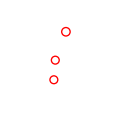

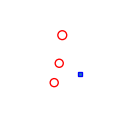

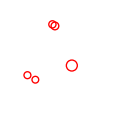

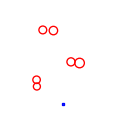

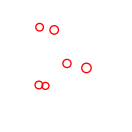

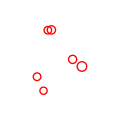

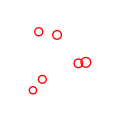

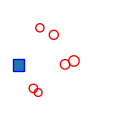

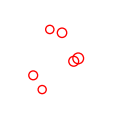

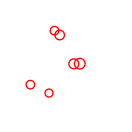

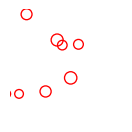

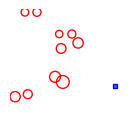

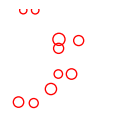

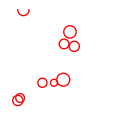

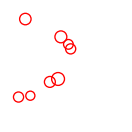

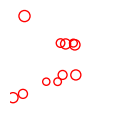

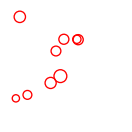

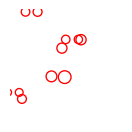

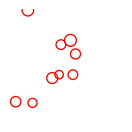

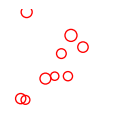

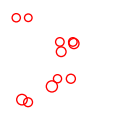

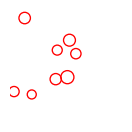

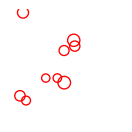

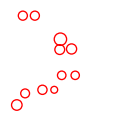

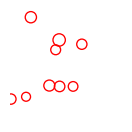

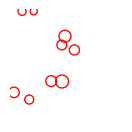

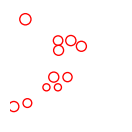

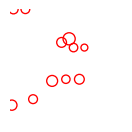

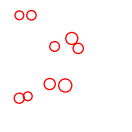

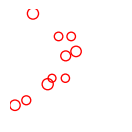

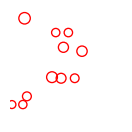

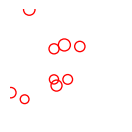

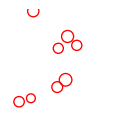

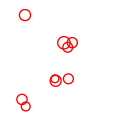

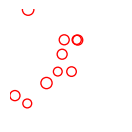

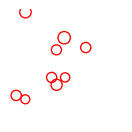

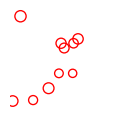

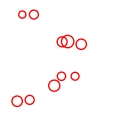

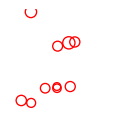

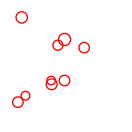

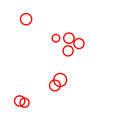

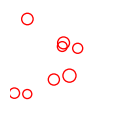

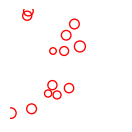

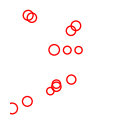

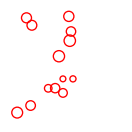

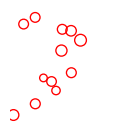

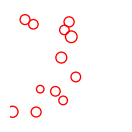

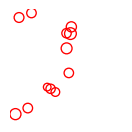

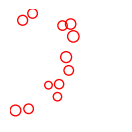

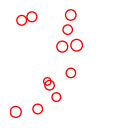

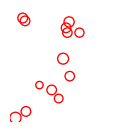

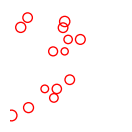

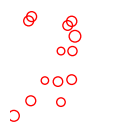

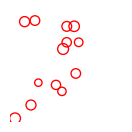

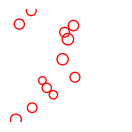

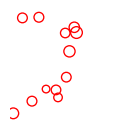

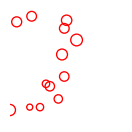

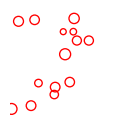

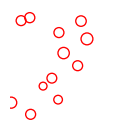

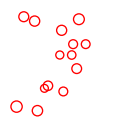

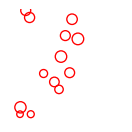

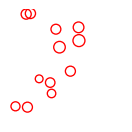

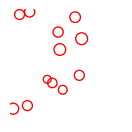

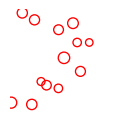

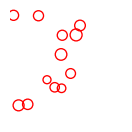

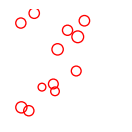

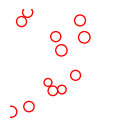

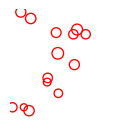

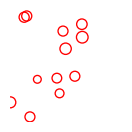

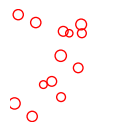

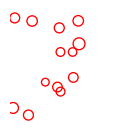

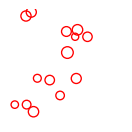

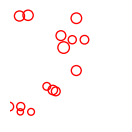

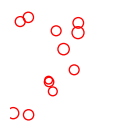

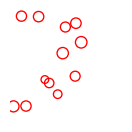

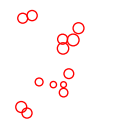

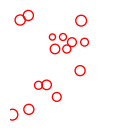

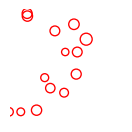

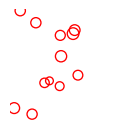

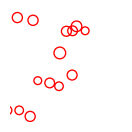

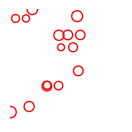

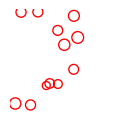

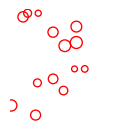

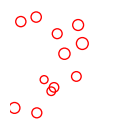

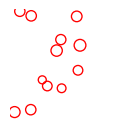

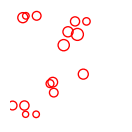

In [4]:
#print(stop)
for i in range(1,2):
    print('iiiiiiiiiiiiii',i)
    t=31
    b=3
    r_i=5
    pix=150
    run=i
    x,y,r,ide,split_prob=ini_pic(b,r_i,pix,0,run)
    gt(x,y,r,0,run,ide,split_prob)
    mv=0.07

    for l in range(1,t):
        
       
        x=x[ide>0]
        y=y[ide>0]
        r=r[ide>0]
        ide=ide[ide>0]
        
        
        
        x,y,r,ide,split_id,split_prob = move(x,y,r,mv,l,pix,run,ide)
        print(l,len(x),ide)
        #x,y,r = ini_pic(b,r_i,pix,l,run)
        gt(x,y,r,l,run,ide,split_prob,split_id,shuffle=True)

In [5]:
x=0.034
c=0.03366667
b=[0.03366667,0.034,0.03466667]

print(x in b or c in b)

print(np.arange(1,4))

True
[1 2 3]


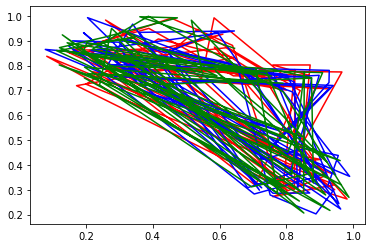

In [6]:
run=3
xl,yl,rl= np.loadtxt('./'+str(run)+'_GT'+'/'+'pos_GT.txt',skiprows=1, delimiter='\t', usecols=(0,1,2), unpack=True)

x1=[]
y1=[]
x2_t=[]
y2_t=[]
x2=[]
y2=[]
x3=[]
y3=[]

for i in range(len(xl)):
    if i % 3 == 0:
        x1.append(xl[i])
        y1.append(yl[i])
        
    else:
        x2_t.append(xl[i])
        y2_t.append(yl[i])
        
for i in range(len(x2_t)):
    
    if i % 2 == 0:
        x2.append(x2_t[i])
        y2.append(y2_t[i])
        
    else:
        x3.append(x2_t[i])
        y3.append(y2_t[i])
        
        



plt.plot(x1,y1,c='red')
plt.plot(x2,y2,c='blue')
plt.plot(x3,y3,c='green')
plt.show()